# The Problem Statement:
To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.


#                         Cardiovascular Disease Detection

# Features:
1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |


# Importing Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [58]:
data=pd.read_csv('cardio_train.csv',sep=';')
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [59]:
#Dropped ID feature
data.drop(['id'],axis =1, inplace=True)

# Familiarisation with the dataset.

In [60]:
data.shape

(69301, 12)

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


In [28]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


# Null/Missing Value analysis

In [62]:
data.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

The Dataset has no Missing /Null Values

# Checking the ratio of classes

In [30]:
data.cardio.value_counts()

0    34679
1    34622
Name: cardio, dtype: int64

from the above values it can be said that the dataset is balanced.

# Skewness Analysis

In [31]:
data.skew()

age            -0.307388
gender          0.631203
height         -0.634040
weight          1.005120
ap_hi          84.886144
ap_lo          32.101546
cholesterol     1.587480
gluc            2.397520
smoke           2.907579
alco            3.951845
active         -1.531525
cardio          0.001645
dtype: float64

# Skewness Removal

In [32]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log1p(data[col])

In [33]:
data.skew()

age           -0.307388
gender         0.631203
height        -0.634040
weight         0.215584
ap_hi         -1.864410
ap_lo          5.540008
cholesterol    1.437291
gluc           2.251223
smoke          2.907579
alco           3.951845
active        -1.531525
cardio         0.001645
dtype: float64

# Univariate Analysis

# 1.Plotting Box Plots for outliers analysis

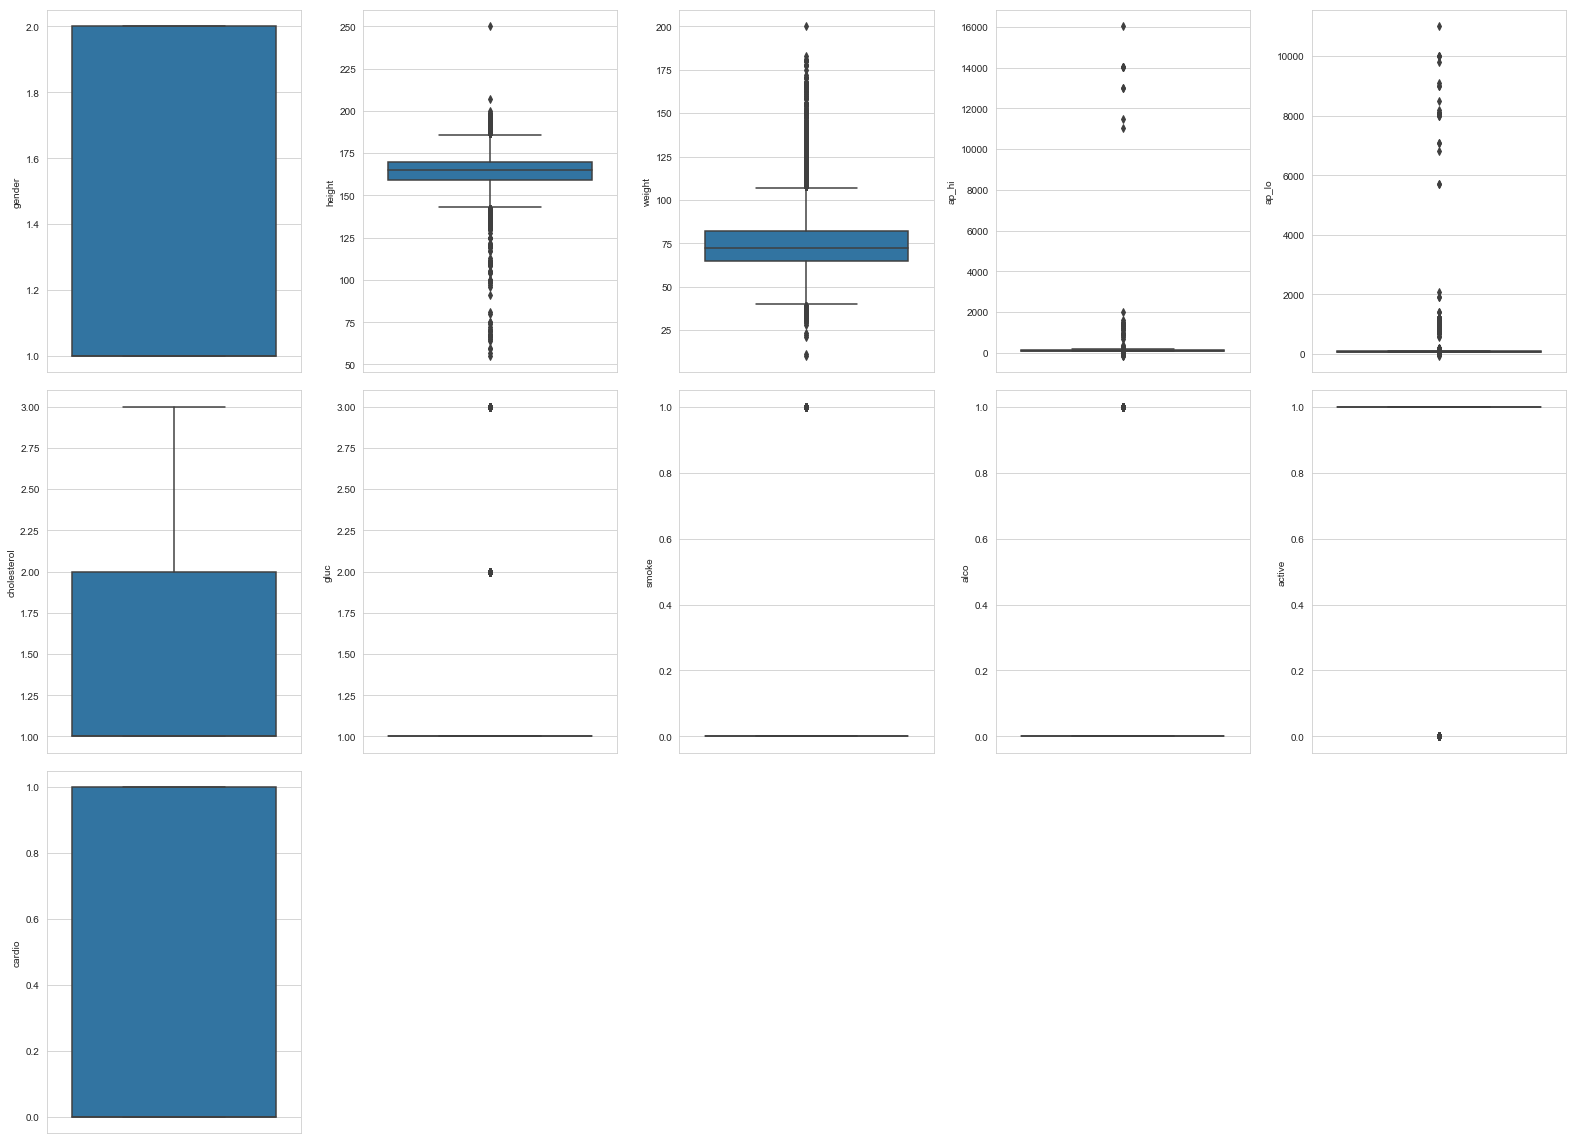

In [98]:
# check outliers

def check_outliers(data):
    l = data.columns.values
    number_of_columns=(len(l)-1)/2
    number_of_rows = 2
    
    plt.figure(figsize=(4*number_of_columns,8*number_of_rows))
    for i in range(1,len(l)):
        plt.subplot(number_of_rows + 1,number_of_columns,i)
        sns.set_style('whitegrid')
        sns.boxplot(data[l[i]],orient='v')
        plt.tight_layout()
        
check_outliers(data)

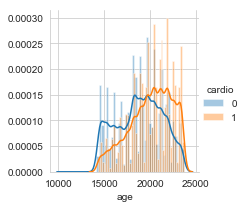

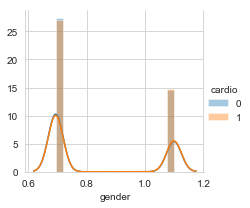

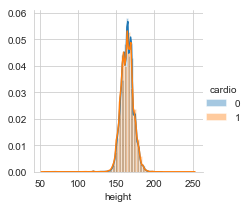

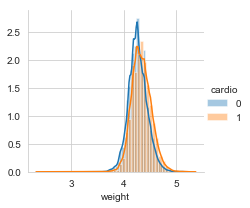

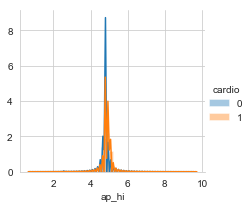

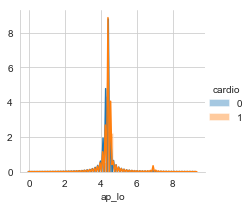

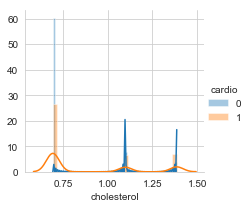

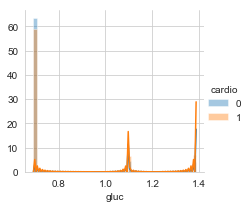

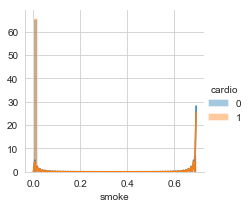

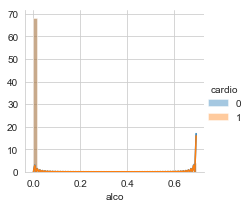

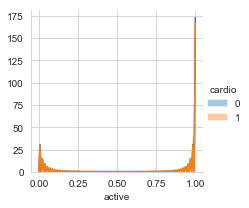

In [36]:
import warnings
warnings.filterwarnings("ignore")
columns=list(data.columns[:-1])
for val in columns:
#Plotting Probablity Density Function Curve for the columns : -
    sns.FacetGrid(data,hue="cardio",size=3)\
    .map(sns.distplot,val)\
    .add_legend()
    plt.show()

# Bivariate Analysis

In [99]:
1.BarPlot

SyntaxError: invalid syntax (<ipython-input-99-2f5246fa3010>, line 1)

---------BarPlot-------
BarPlots for the features based on Target


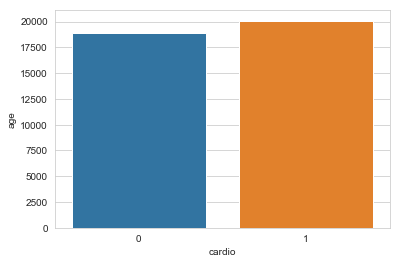

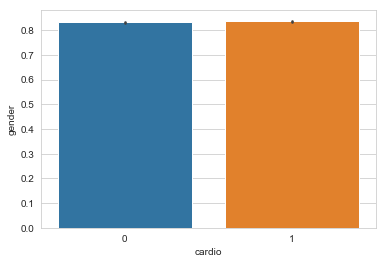

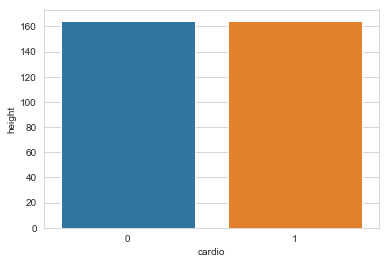

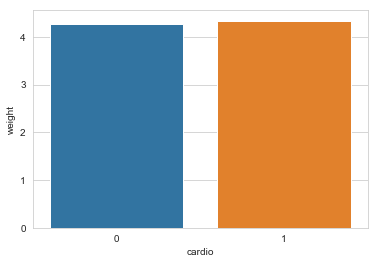

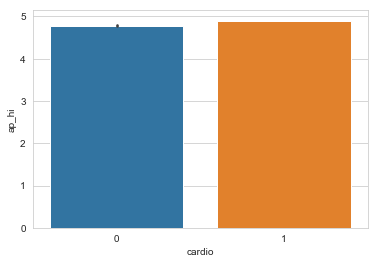

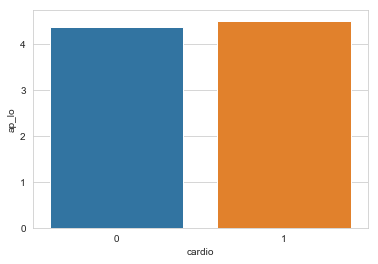

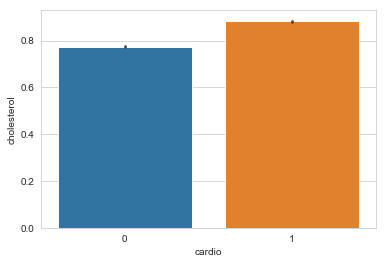

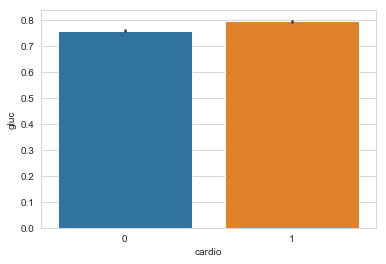

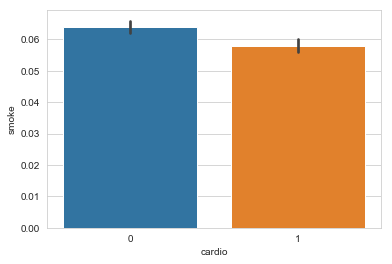

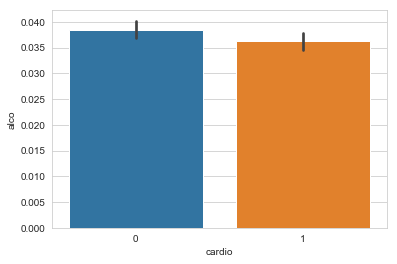

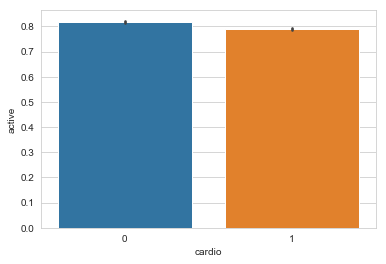

In [35]:
print("---------BarPlot-------")
columns=data.columns[:-1]
print('BarPlots for the features based on Target')
for val in columns:
    sns.barplot(x='cardio',y=val,data=data)
    plt.show()

# 2.Pair Plot

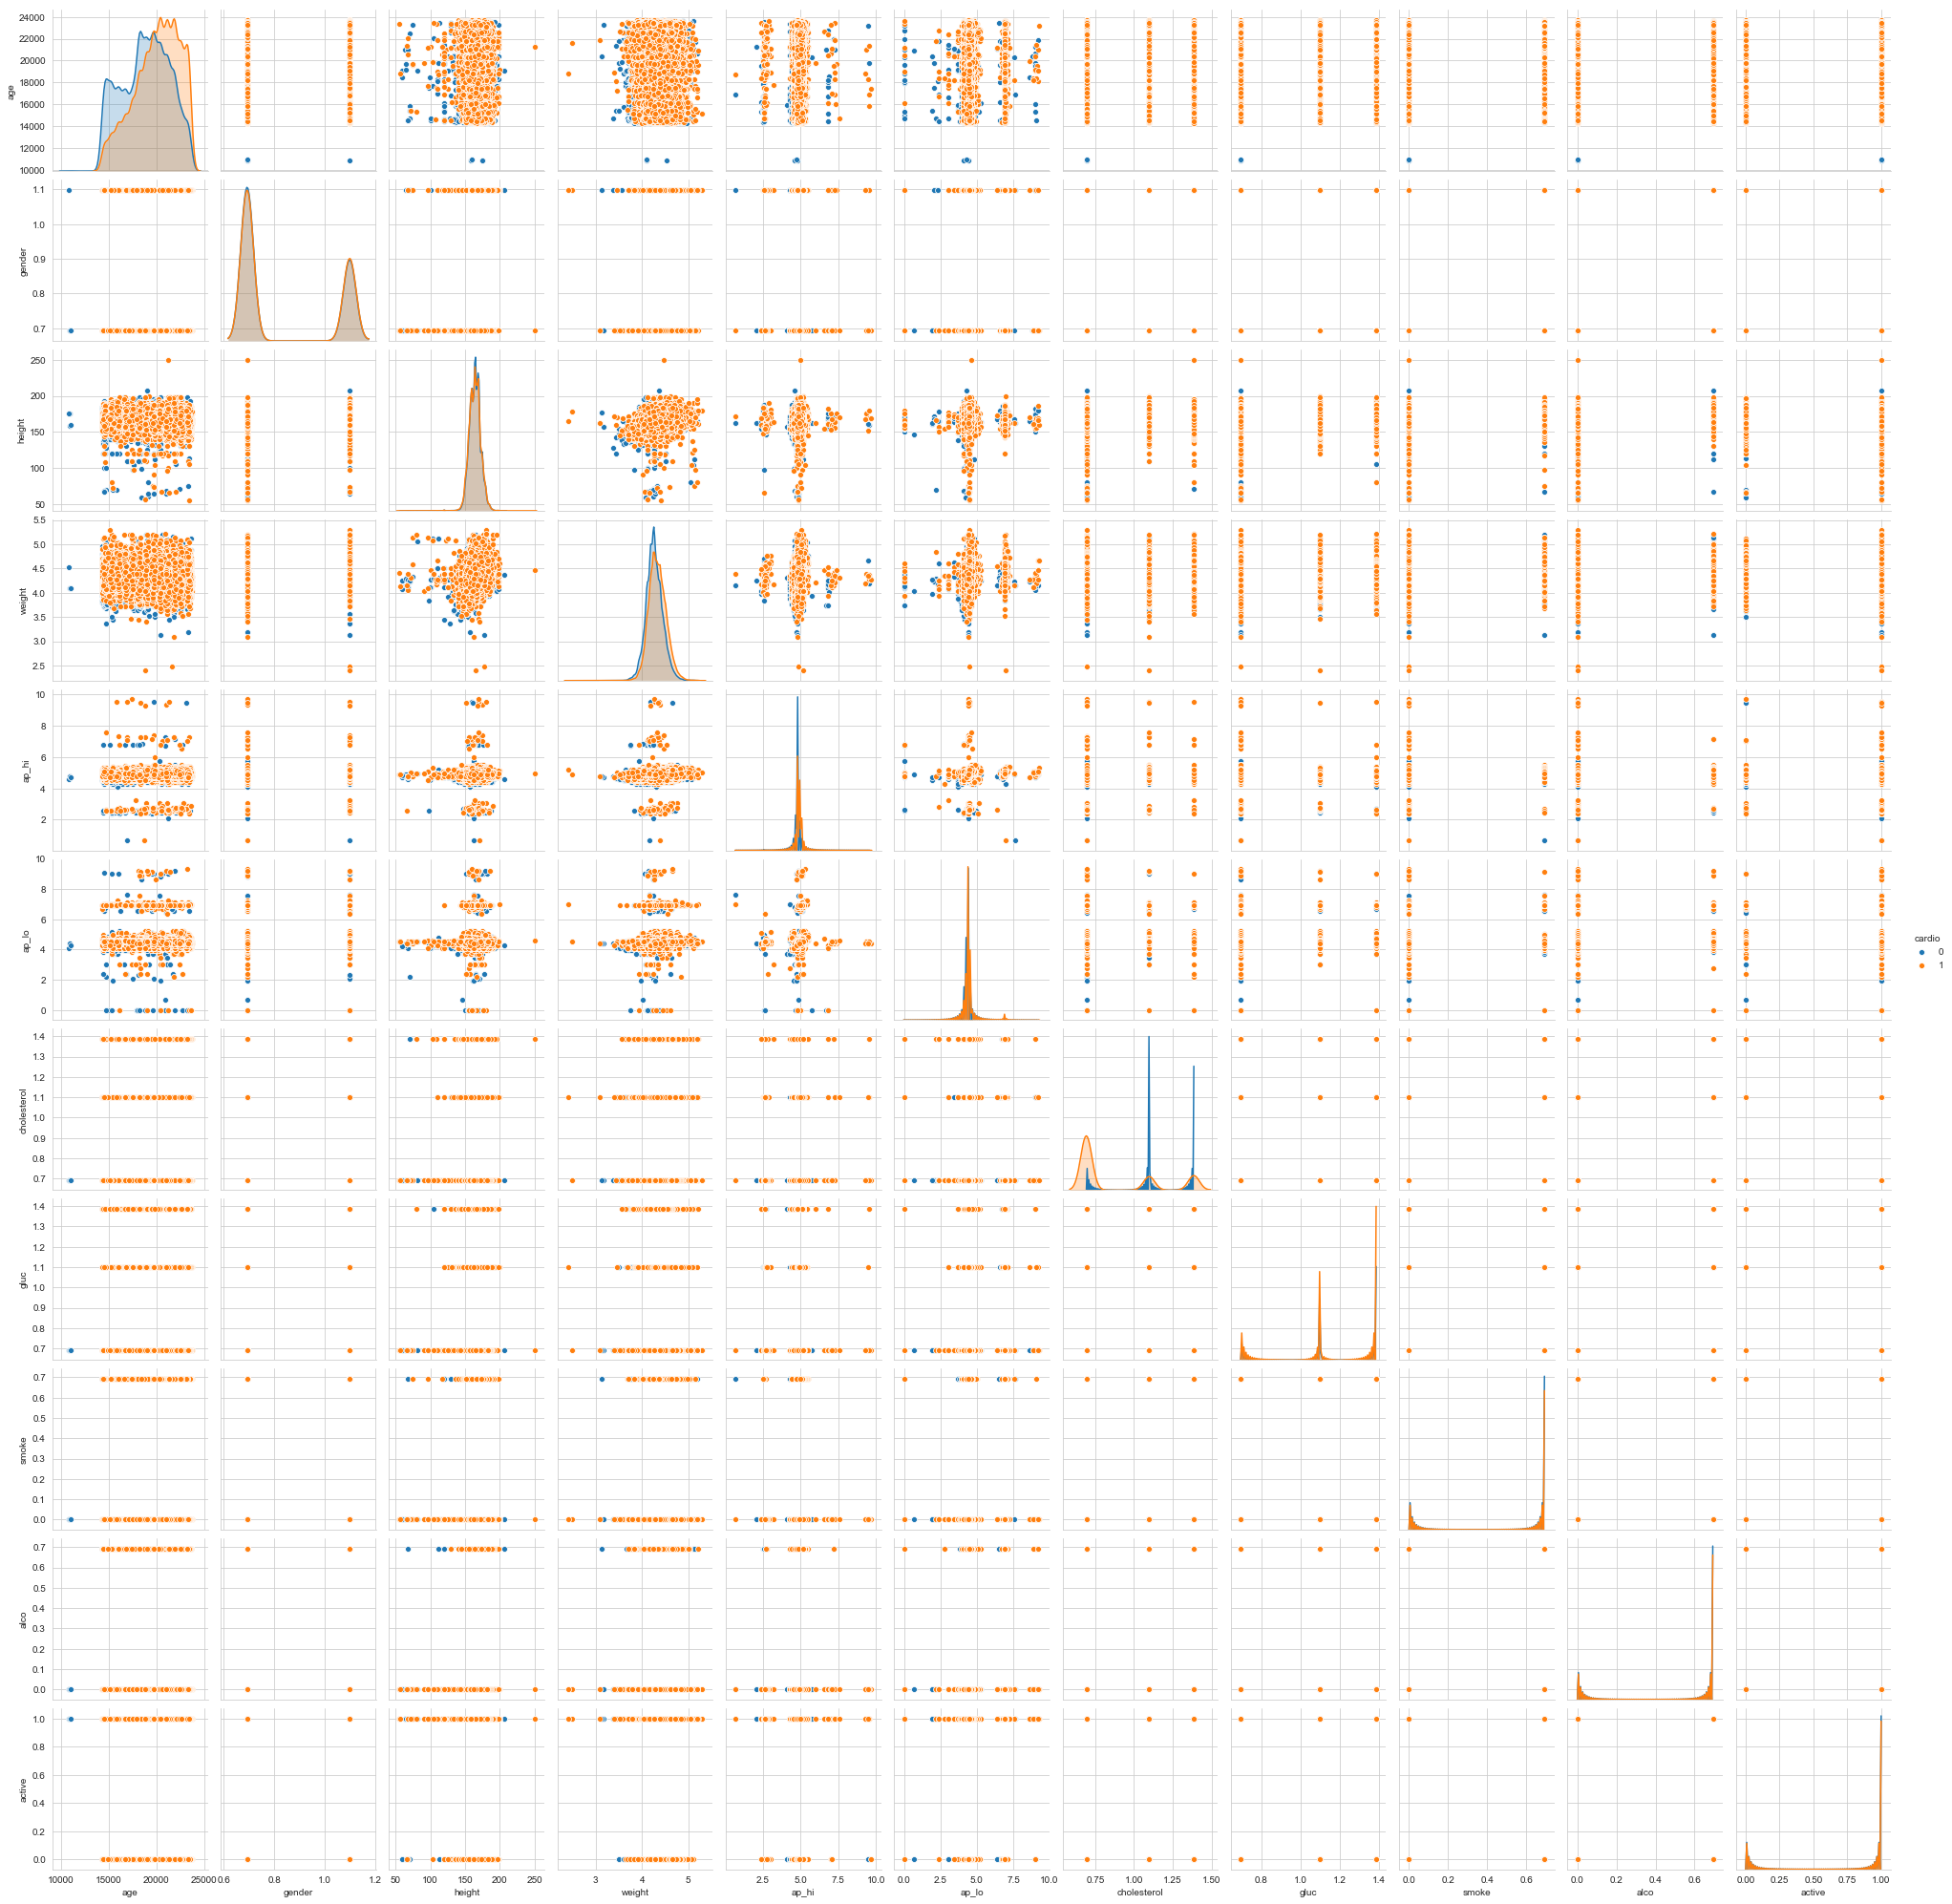

In [37]:
sns.pairplot(data , hue='cardio')

# CorRelation Matrix
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

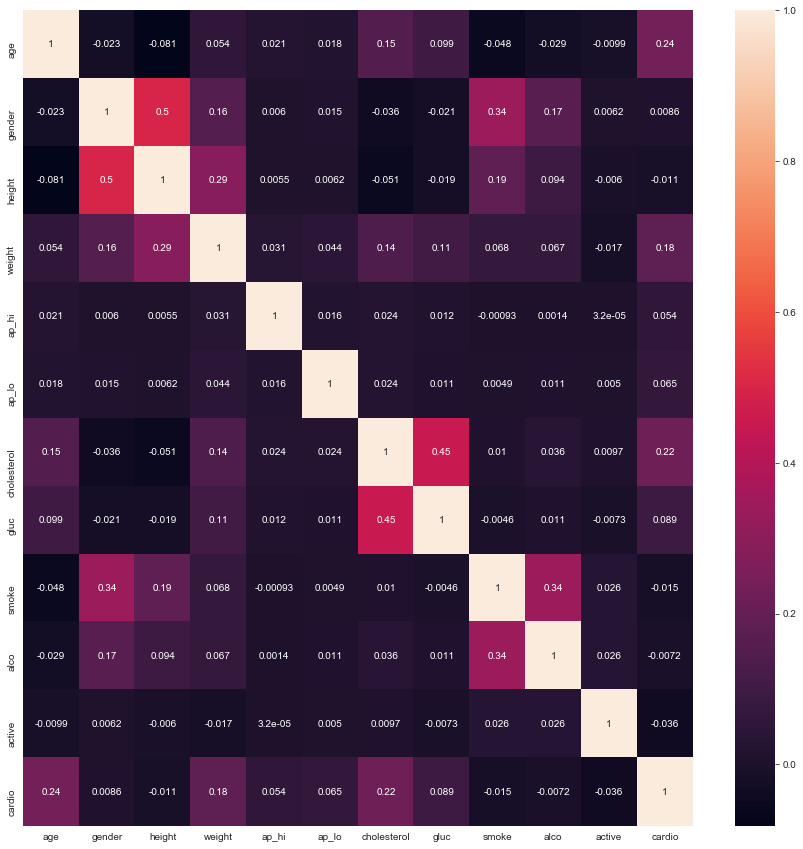

In [63]:
df_cor=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(df_cor,annot=True)

# Feature selection based on correlation matrix
From the below code I have removed the features which are having correlation of more than 0.8. This results in stable parameter estimates of classification which makes it easy to assess the effect of independent variables on dependent variables

In [64]:
columns = np.full((df_cor.shape[0]),True,dtype=bool)
for i in range(df_cor.shape[0]):
    for j in range(i+1, df_cor.shape[0]):
        if df_cor.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
data = data[selected_columns]

In [65]:
data.shape

(69301, 12)

By looking into the shape after performing feature selection using CorRelation ,we found the the features are not very very high corRelated , that's why the shape is not changed for the new data

# Handling Outliers

In [66]:
from scipy.stats import zscore
zs=np.abs(zscore(data))
zs

array([[1.21601824, 0.73302344, 1.14099939, ..., 0.23864069, 0.49376463,
        0.99917784],
       [1.95391548, 0.73302344, 0.16601717, ..., 0.23864069, 0.49376463,
        1.00082284],
       [0.98580185, 0.73302344, 0.07772839, ..., 0.23864069, 0.49376463,
        0.99917784],
       ...,
       [0.16325352, 1.36421285, 2.27143838, ..., 4.19040018, 2.02525646,
        1.00082284],
       [1.20061644, 0.73302344, 0.16601717, ..., 0.23864069, 2.02525646,
        1.00082284],
       [0.43417421, 0.73302344, 0.68709227, ..., 0.23864069, 0.49376463,
        0.99917784]])

In [67]:
df=data[(zs<3).all(axis=1)]
print('shape of the data with outliers  ' ,data.shape)
print('shape of the data without  outliers  ' ,df.shape)

shape of the data with outliers   (69301, 12)
shape of the data without  outliers   (55140, 12)


In this section we have treated the outliers with the help of ZSCORE using threshold value as 3 ,The features which are having the zscore value > 3 are treated as outliers and have been removed.

Hence the new shape of the dataset after outliers removal is (55140, 12) . Now this will be our finalised Dataset for modelling.

# Separating the dependent and independent variables

In [68]:
y=df['cardio']
x=df.drop(['cardio'],axis=1)

# Standard Scaling the data for normalisation

In [69]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [70]:
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,1.226812,-0.645789,-1.176138,-0.300981,0.245909,-0.098609,1.266570,3.489359,0.0,0.0,0.500340
1,-1.938532,-0.645789,-0.118405,-0.147224,-0.880429,-1.078339,-0.468423,-0.286586,0.0,0.0,0.500340
2,0.996929,-0.645789,0.146028,-0.224102,-0.317260,-0.098609,-0.468423,-0.286586,0.0,0.0,0.500340
3,1.600776,-0.645789,-1.176138,-0.839130,-0.317260,-0.098609,-0.468423,-0.286586,0.0,0.0,0.500340
4,0.690148,-0.645789,0.013812,-0.916008,-1.443598,-1.078339,-0.468423,-0.286586,0.0,0.0,0.500340
...,...,...,...,...,...,...,...,...,...,...,...
55135,-0.261357,-0.645789,-0.382838,-1.300401,2.498585,0.881121,-0.468423,-0.286586,0.0,0.0,0.500340
55136,0.105727,-0.645789,1.071545,-0.224102,0.245909,0.881121,-0.468423,-0.286586,0.0,0.0,0.500340
55137,0.662222,-0.645789,0.146028,0.544683,1.372247,-0.098609,-0.468423,-0.286586,0.0,0.0,0.500340
55138,1.211432,-0.645789,-0.118405,-0.070345,0.527493,-0.098609,-0.468423,3.489359,0.0,0.0,-1.998641


In [71]:
x.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

# Applying Various Classification Models
In this section we will be applying several classification models and hence we will be checking following performance matrix :

1) Accuracy score

2) AUC Score

3) Mean of crossing validation score using accuracy as scoring

4) Std Deviation of crossing validation score using accuracy as scoring

5) Confusion Matrix

We have also used GridSearch for tuning the parameters

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Function for Accuracy Score
This function is built to find the best accuracy score depending on the random state while splitting the model. This function prints the best accuracy score and returns the random state for that accuracy score

In [73]:
def accur_at_rstate(model,x,y):
    random_state=np.arange(42,101)
    accuracy=0
    for r_state in random_state:
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
        #DT=DecisionTreeClassifier()
        model.fit(train_x,train_y)
        pred = model.predict(test_x)
        #print('The accuracy for the {} is {}'.format(r_state,accuracy_score(test_y,pred_DT)))
        if accuracy_score(test_y,pred) > accuracy:
            accuracy=accuracy_score(test_y,pred)
            Final_r_state=r_state
        #Calculating 
    print('The maximum accuracy reached is {} at random state {}' .format(accuracy,Final_r_state))
    return Final_r_state
    

# Function for Auc Score and Confusion Matrix
This function will result in auc score for model and also print the confusion matrix

In [74]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
def roc_curve(model,r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=r_state)
    fpr_tr,tpr_tr,threshold = metrics.roc_curve(train_y,model.predict_proba(train_x)[:,1])
    fpr_test,tpr_test,threshold = metrics.roc_curve(test_y,model.predict_proba(test_x)[:,1])
    plt.plot(fpr_tr,tpr_tr ,label="train AUC ="+str(metrics.auc(fpr_tr,tpr_tr)))
    plt.plot(fpr_test,tpr_test ,label="test AUC ="+str(metrics.auc(fpr_test,tpr_test)))
    plt.title('ROC curve')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()
    pred=model.predict(test_x)
    sns.heatmap(confusion_matrix(test_y,pred),annot=True)

# Function for highest_accuracy
This function finds the highest_accuracy of the model

In [75]:
def highest_accuracy(model,x,y,Final_r_state):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=Final_r_state)
    model.fit(train_x,train_y)
    pred = model.predict(test_x)
    return accuracy_score(test_y,pred)

Below function is created to make a list of highest_accuracy generated by different classifier , so that it can be compared at last, for the selection of the best model

In [76]:
accuracy=[]
def list_accuracy(x):
    accuracy.append(x)
    return accuracy

# 1.DecisionTreeClassifier

In [77]:
from sklearn.model_selection import GridSearchCV
#max_depth = np.arange(30)
depth={'max_depth':range(0,30)}
DT=DecisionTreeClassifier()
gs=GridSearchCV(DT,depth,cv=10)
gs.fit(x,y)
gs.best_params_

{'max_depth': 4}

The maximum accuracy reached is 0.7369121025269012 at random state 73
Cross_val_score  0.7296155241204207


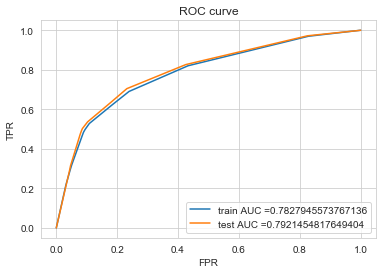

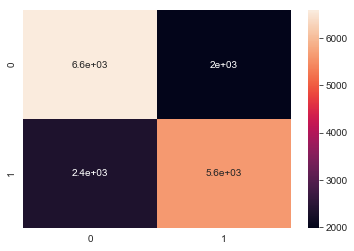

In [78]:
DT=DecisionTreeClassifier(max_depth=4)
Final_Random_state=accur_at_rstate(DT,x,y)
from sklearn.model_selection import cross_val_score
print('Cross_val_score ',cross_val_score(DT,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(DT,Final_Random_state)

In [79]:
Max_accuracy=highest_accuracy(DT,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 2.Naive Bayes

In [80]:
from sklearn.naive_bayes import BernoulliNB
alpha={'alpha':range(1,30)}
NB=BernoulliNB()
gs=GridSearchCV(NB,alpha,cv=10)
gs.fit(x,y)
gs.best_params_

{'alpha': 1}

The maximum accuracy reached is 0.7185950912827953 at random state 97
Cross_val_score  0.7126586869785999


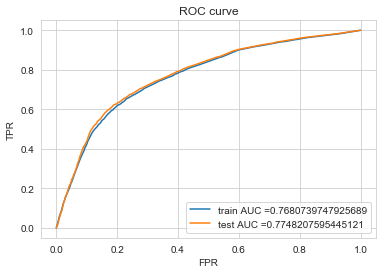

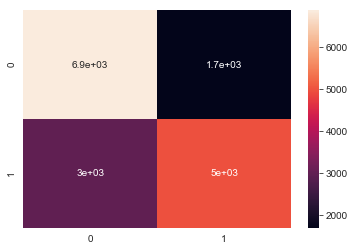

In [81]:
NB=BernoulliNB(alpha=1)
Final_Random_state=accur_at_rstate(NB,x,y)
print('Cross_val_score ',cross_val_score(NB,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(NB,Final_Random_state)

In [82]:
Max_accuracy=highest_accuracy(NB,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 3.Logistic Regression

In [84]:
C={'C':range(1,30),'penalty':['l1', 'l2', 'elasticnet']}
log=LogisticRegression()
gs=GridSearchCV(log,C,cv=10)
gs.fit(x,y)
gs.best_params_

{'C': 1, 'penalty': 'l2'}

The maximum accuracy reached is 0.731713214847056 at random state 73
Cross_val_score  0.7255531374682626


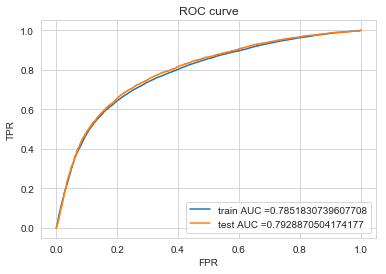

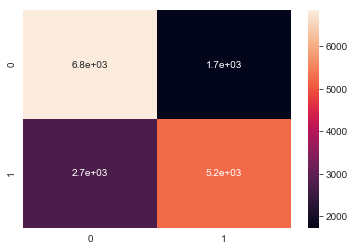

In [85]:
log=LogisticRegression(C=1,penalty='l2')
Final_Random_state=accur_at_rstate(log,x,y)
print('Cross_val_score ',cross_val_score(log,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(log,Final_Random_state)

In [86]:
Max_accuracy=highest_accuracy(log,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# 4.RandomForestClassifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
parameters={'n_estimators':range(1,40)}
RF=RandomForestClassifier()
gs=GridSearchCV(RF,parameters,cv=5)
gs.fit(x,y)
gs.best_params_

{'n_estimators': 36}

The maximum accuracy reached is 0.7121871599564744 at random state 50
Cross_val_score  0.7060210373594488


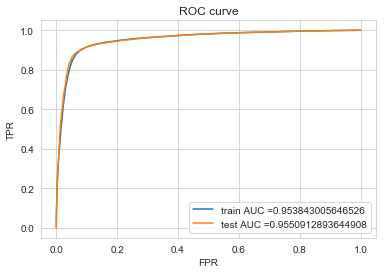

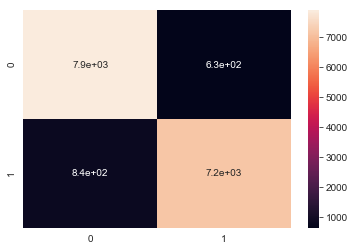

In [89]:
RF=RandomForestClassifier(n_estimators=36)
Final_Random_state=accur_at_rstate(RF,x,y)
print('Cross_val_score ',cross_val_score(RF,x,y,cv=5 ,scoring='accuracy').mean())
roc_curve(RF,Final_Random_state)

In [91]:
Max_accuracy=highest_accuracy(RF,x,y,Final_Random_state)
List_acc=list_accuracy(Max_accuracy)

# Plotting Bargraph to Analyse the Performance Matrix

In [92]:
model =['DT','NB','LOG','RF']

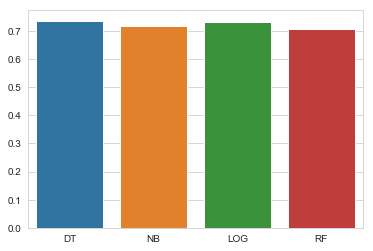

In [93]:
sns.barplot(x=model,y=List_acc)

From the data of the above model performance , we can see that Random Forest is working most efficiently 
compared to other classifier model. It has better accuracy ans auc score .

Therefore based on the anaylysis , Random forest is selected as the best model.

# Final Model ----> RandomForestClassifier

Accuracy 0.7018498367791077
--------------------------------------


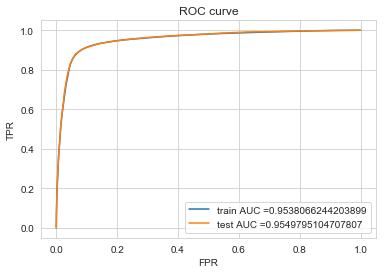

-----------------Confusion Matrix---------------------


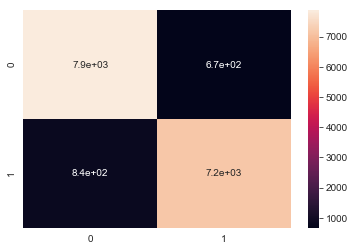

In [94]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=63)
RF=RandomForestClassifier(n_estimators=36)
RF.fit(train_x,train_y)
pred = RF.predict(test_x)
print('Accuracy',accuracy_score(test_y,pred))
print('--------------------------------------')
roc_curve(RF,50)
print('-----------------Confusion Matrix---------------------')


In [95]:
print('classification Report \n',classification_report(test_y,pred))

classification Report 
               precision    recall  f1-score   support

           0       0.70      0.74      0.72      8588
           1       0.70      0.66      0.68      7954

    accuracy                           0.70     16542
   macro avg       0.70      0.70      0.70     16542
weighted avg       0.70      0.70      0.70     16542



In [97]:
print('mean cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='accuracy').mean())
print('std deviation of cross_val_score',cross_val_score(RF,x,y,cv=5,scoring='accuracy').std())

mean cross_val_score 0.7083061298512876
std deviation of cross_val_score 0.0035336149250015706


# Saving the Model

In [101]:
from sklearn.externals import joblib
joblib.dump(RF,"RF_cardio_vascular.pkl")

['RF_cardio_vascular.pkl']

# Conclusion :-
In this project we have found that this is dataset is classification driven dataset as output class is binary ,that is either either the patient is suffering from cardio vascular disease or not.

With the help of this data set I have tried to predict the cardio vascular disease using ML algorithM

In this project we have performed Null value analysis ,Univariate analysis ,Bivariate analysis amd several EDA techniques.

I have also scaled the data in order to remove the skewness and at last I have performed several clasiification algorithm and based on the accuracy we have finalised Random Forest as the best model for this dataset and I also checked the cross validate score for this model in order to analyse underfit/Overfit of the data.

At last I have saved the mode